In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

import sys
sys.path.append('..')
from attention.utils.metadata import df_baseline
from attention.utils.analysis import category_set_summary

In [2]:
plt.style.use('seaborn-bright')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
markers = ['o', 'D', 's', 'X']

styles = {
    '0': dict(marker=markers[0], color=colors[0]),
    '1': dict(marker=markers[1], color=colors[1]),
    'in': dict(label='in-set categories', marker=markers[0], color=colors[0]),
    'out': dict(label='out-of-set categories', marker=markers[1], color=colors[1])}

small = 8
medium = 10
big = 12

plt.rc('font', size=medium) # default fontsize
plt.rc('axes', titlesize=big) # fontsize of the axes title
plt.rc('axes', labelsize=big) # fontsize of the x and y labels
plt.rc('xtick', labelsize=big) # fontsize of the tick labels
plt.rc('ytick', labelsize=big) # fontsize of the tick labels
plt.rc('legend', fontsize=medium) # legend fontsize
plt.rc('figure', titlesize=big) # fontsize of the figure title

In [3]:
def scatter_line(ax, x, y, style):
    ax.scatter(x, y, **style)
    ax.vlines(x, ymin=0, ymax=y, color=style['color'])
    
def plot_change_acc(df, x):
    fig, ax = plt.subplots()
    scatter_line(ax, x, df['acc_change_in'], styles['in'])
    scatter_line(ax, x, df['acc_change_out'], styles['out'])
    plt.ylabel('Accuracy change')
    plt.legend(title='Source of test examples')
    plt.axhline(y=0, color='k', linestyle='--', linewidth=0.8)
    plt.tight_layout()
    return fig, ax

### Semantic category sets

In [4]:
sem_labels = ['kitchen', 'dogs', 'cats', 'wearable', 'transport', 'birds']
sem_labels_plot = ['', 'kitchen\nitems', 'dogs', 'cats', 'wearable\nitems', 'land\ntransport', 'birds']
df_sem = category_set_summary(type_category_set='sem', version_wnids=2, version_weights=9)
df_sem.insert(0, 'label', sem_labels)
df_sem

,label,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,kitchen,35,0.446404,0.512857,0.650902,0.670401,0.527051,0.157544,-0.123851,92
1,dogs,129,0.553892,0.661008,0.643858,0.684884,0.621002,0.023877,-0.022856,31
2,cats,13,0.854177,0.708462,0.645248,0.782407,0.582139,0.073946,-0.063109,134
3,wearable,56,0.432272,0.535536,0.652627,0.660537,0.543158,0.125001,-0.109469,71
4,transport,45,0.428524,0.716000,0.642775,0.773848,0.599449,0.057848,-0.043326,65
5,birds,60,0.534972,0.824833,0.634660,0.863222,0.605363,0.038389,-0.029297,53


In [5]:
df_sem_sorted = df_sem.sort_values(by='acc_change_in', ascending=False)

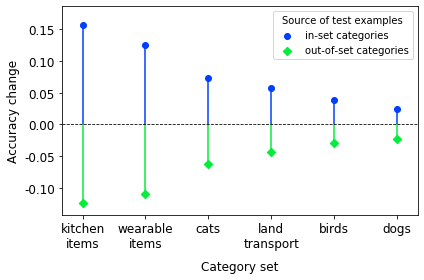

In [6]:
fig, ax = plot_change_acc(df_sem_sorted, range(len(df_sem_sorted)))
labels_sorted = list(df_sem_sorted['label'])
labels_sorted_plot = ['', 'kitchen\nitems', 'wearable\nitems', 'cats', 'land\ntransport', 'birds', 'dogs']
ax.set_xticklabels(labels_sorted_plot)
plt.xlabel('Category set', labelpad=10)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.tight_layout()
# plt.savefig('sem_acc.pdf')
plt.show()

In [7]:
np.std(df_sem['acc_change_in'])

0.047337291994678045

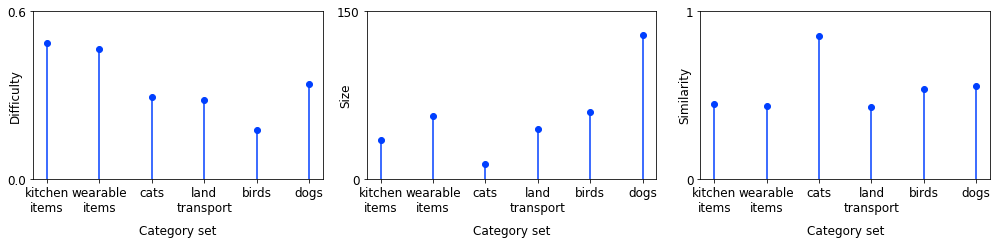

In [8]:
fig, ax = plt.subplots(1, 3, figsize=(14, 3.5))

scatter_line(ax[1], range(len(df_sem_sorted)), df_sem_sorted['size'], styles['in'])
scatter_line(ax[0], range(len(df_sem_sorted)), 1-df_sem_sorted['acc_base_in'], styles['in'])
scatter_line(ax[2], range(len(df_sem_sorted)), df_sem_sorted['similarity'], styles['in'])

size_lims = (0, 150)
diff_lims = (0, 0.6)
sim_lims = (0, 1)

ax[1].set_ylabel('Size', labelpad=-15)
ax[1].set_yticks(size_lims)
ax[1].set_ylim(size_lims)
ax[0].set_ylabel('Difficulty', labelpad=-15)
ax[0].set_yticks(diff_lims)
ax[0].set_ylim(diff_lims)
ax[2].set_ylabel('Similarity', labelpad=-5)
ax[2].set_yticks(sim_lims)
ax[2].set_ylim(sim_lims)

for a in ax:
    a.set_xticklabels(labels_sorted_plot)
    a.set_xlabel('Category set', labelpad=10)
    
plt.tight_layout()
# plt.savefig('sem_stats.pdf')
plt.show()

### Difficulty-based category sets

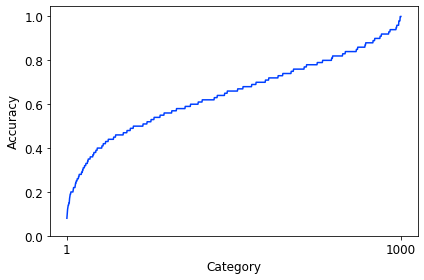

In [9]:
fig, ax = plt.subplots()
plt.plot(range(1000), sorted(df_baseline['accuracy']))
plt.xticks((0, 999))
ax.set_xticklabels((1, 1000))
# plt.ylim((0, 1))
plt.ylim(bottom=0)
plt.xlabel('Category')
plt.ylabel('Accuracy')
plt.tight_layout()
plt.show()

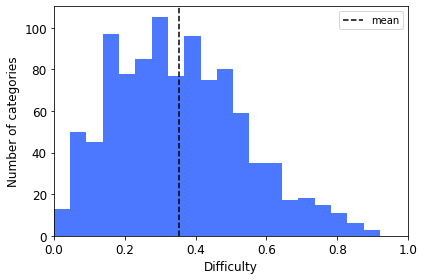

In [10]:
plt.hist(1-df_baseline['accuracy'], bins=20, alpha=0.7)
plt.axvline(np.mean(1-df_baseline['accuracy']), color='k', linestyle='--', label='mean')
plt.xlim((0, 1))
plt.xlabel('Difficulty')
plt.ylabel('Number of categories')
plt.legend()
plt.tight_layout()
plt.show()

In [11]:
df_diff = category_set_summary(type_category_set='diff', version_wnids=2, version_weights=3)

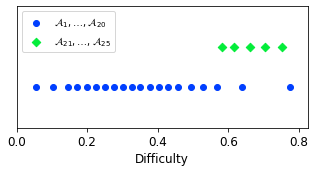

In [12]:
fig, ax = plt.subplots(figsize=(4.5, 2.5))
plt.scatter(
    1-df_diff['acc_base_in'][:20],
    np.ones(20),
    **styles['0'],
    label=r'$\mathcal{A}_1, \dots, \mathcal{A}_{20}$')
plt.scatter(
    1-df_diff['acc_base_in'][20:],
    2*np.ones(5),
    **styles['1'],
    label=r'$\mathcal{A}_{21}, \dots, \mathcal{A}_{25}$')
plt.xlim(left=0)
plt.ylim((0, 3))
plt.xlabel('Difficulty')
plt.gca().axes.get_yaxis().set_visible(False)
plt.legend(loc='upper left')
plt.tight_layout()
# plt.savefig('diff_coverage.pdf')
plt.show()

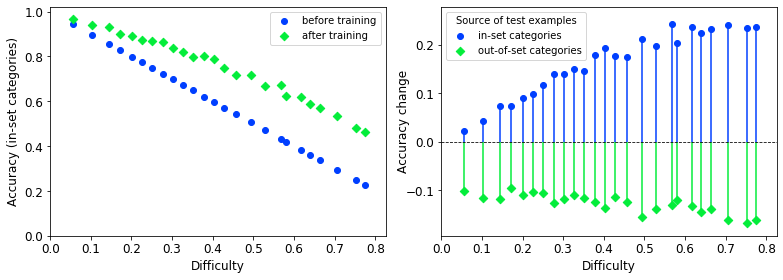

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))

x = list(1-df_diff['acc_base_in'])

ax[0].scatter(x, df_diff['acc_base_in'], **styles['0'], label='before training')
ax[0].scatter(x, df_diff['acc_trained_in'], **styles['1'], label='after training')
scatter_line(ax[1], x, df_diff['acc_change_in'], styles['in'])
scatter_line(ax[1], x, df_diff['acc_change_out'], styles['out'])

ax[1].set_ylabel('Accuracy change', labelpad=-5)
ax[0].set_ylabel('Accuracy (in-set categories)')
ax[1].legend(title='Source of test examples')
ax[0].legend()
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[0].set_ylim(bottom=0)

for a in ax:
    a.set_xlabel('Difficulty')
    a.set_xlim(left=0)
    
plt.tight_layout()
# plt.savefig('diff_acc.pdf')
plt.show()

### Size-based category sets

In [14]:
df_size_v6 = category_set_summary(type_category_set='size', version_wnids=4, version_weights=6).iloc[1:]
df_size_v6.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.471780,0.630000,0.646102,0.949495,0.586551,0.319495,-0.059551,300
2,4,0.460416,0.627500,0.646145,0.973545,0.517930,0.346045,-0.128215,300
3,8,0.402342,0.645000,0.646079,0.951872,0.387327,0.306872,-0.258752,300
4,16,0.382833,0.665000,0.645762,0.898417,0.444692,0.233417,-0.201070,174
5,32,0.424631,0.655625,0.645754,0.845651,0.469524,0.190026,-0.176230,137


In [15]:
df_size_v7 = category_set_summary(type_category_set='size', version_wnids=5, version_weights=7).iloc[1:]
df_size_v7.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
1,2,0.298697,0.670000,0.646022,0.940000,0.589368,0.270000,-0.056654,300
2,4,0.345680,0.622500,0.646165,0.956989,0.455257,0.334489,-0.190908,300
3,8,0.473047,0.658750,0.645968,0.945736,0.461182,0.286986,-0.184786,300
4,16,0.441069,0.657500,0.645884,0.886889,0.425643,0.229389,-0.220242,197
5,32,0.440449,0.658438,0.645661,0.847413,0.476740,0.188976,-0.168921,127


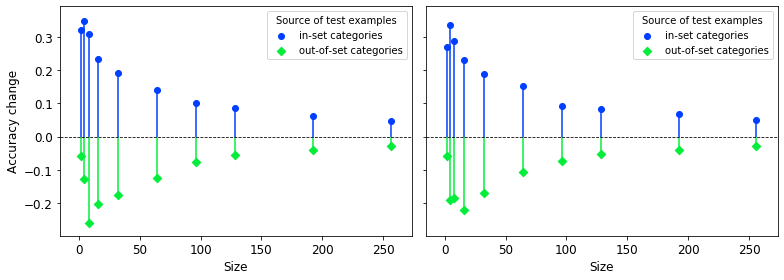

In [16]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(11, 4))

x = list(df_size_v6['size'])

scatter_line(ax[0], x, df_size_v6['acc_change_in'], styles['in'])
scatter_line(ax[0], x, df_size_v6['acc_change_out'], styles['out'])
scatter_line(ax[1], x, df_size_v7['acc_change_in'], styles['in'])
scatter_line(ax[1], x, df_size_v7['acc_change_out'], styles['out'])

ax[0].set_ylabel('Accuracy change')
ax[0].legend(title='Source of test examples')
ax[1].legend(title='Source of test examples')
ax[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

for a in ax:
    a.set_xlabel('Size')
    
plt.tight_layout()
# plt.savefig('size_acc.pdf')
plt.show()

### Similarity-based category sets

In [17]:
df_sim_v3 = category_set_summary(type_category_set='sim', version_wnids=3, version_weights=3)
df_sim_v3.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.716746,0.6000,0.648495,0.760448,0.525034,0.160448,-0.123460,89
1,50,0.512130,0.6112,0.647905,0.802811,0.507715,0.191611,-0.140190,93
2,50,0.453881,0.6492,0.645905,0.802083,0.536498,0.152883,-0.109407,90
3,50,0.427748,0.6744,0.644579,0.832715,0.516972,0.158315,-0.127607,93
4,50,0.671111,0.6872,0.643905,0.800494,0.524112,0.113294,-0.119793,94


In [18]:
df_sim_v4 = category_set_summary(type_category_set='sim', version_wnids=4, version_weights=4)
df_sim_v4.head()

,size,similarity,acc_base_in,acc_base_out,acc_trained_in,acc_trained_out,acc_change_in,acc_change_out,num_epochs
0,50,0.719259,0.5840,0.649337,0.745228,0.510016,0.161228,-0.139321,88
1,50,0.568134,0.6642,0.645116,0.814936,0.521299,0.150736,-0.123817,94
2,50,0.489926,0.6620,0.645232,0.817018,0.512321,0.155018,-0.132911,99
3,50,0.425019,0.6496,0.645884,0.796205,0.519950,0.146605,-0.125934,98
4,50,0.811888,0.7142,0.642484,0.778363,0.572821,0.064163,-0.069664,74


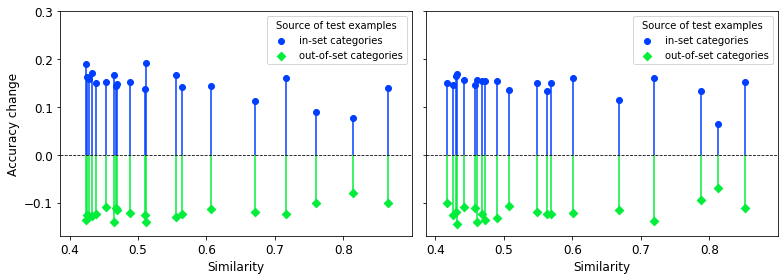

In [19]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(11, 4))

x3 = list(df_sim_v3['similarity'])
x4 = list(df_sim_v4['similarity'])

scatter_line(ax[0], x3, df_sim_v3['acc_change_in'], styles['in'])
scatter_line(ax[0], x3, df_sim_v3['acc_change_out'], styles['out'])
scatter_line(ax[1], x4, df_sim_v4['acc_change_in'], styles['in'])
scatter_line(ax[1], x4, df_sim_v4['acc_change_out'], styles['out'])

ax[0].set_ylabel('Accuracy change')
ax[0].legend(title='Source of test examples')
ax[1].legend(title='Source of test examples')
ax[0].axhline(y=0, color='k', linestyle='--', linewidth=0.8)
ax[1].axhline(y=0, color='k', linestyle='--', linewidth=0.8)

for a in ax:
    a.set_xlabel('Similarity')
    a.set_ylim(top=0.3)
    
plt.tight_layout()
# plt.savefig('sim_acc.pdf')
plt.show()

### Regression

In [20]:
df_size = pd.concat((df_size_v6, df_size_v7), axis=0)
df_sim = pd.concat((df_sim_v3, df_sim_v4), axis=0)

In [21]:
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

def regression(x, y):
    x0 = np.array(x)[:, None]
    x1 = sm.add_constant(x0)
    y = np.array(y)[:, None]
    lr_skl = LinearRegression().fit(x0, y)
    lr_sm = sm.OLS(y, x1).fit()
    
    print('SKL: beta0, beta1, R2')
    print([round(a, 4) for a in [lr_skl.intercept_[0], lr_skl.coef_[0][0], lr_skl.score(x0, y)]])

    print('SM: beta0, beta1, R2')
    print([round(a, 4) for a in lr_sm.params], round(lr_sm.rsquared, 4))
    
    print('SM: p0, p1')
    print([f'{a:.5f}' for a in lr_sm.pvalues])
    
    return lr_sm

def plot_regression(ax, x, ytrue, model):
    xminmax = [min(x), max(x)]
    ypred = model.predict(sm.add_constant(xminmax)[:, None])
    ax.scatter(x, ytrue, color=colors[0])
    ax.plot(xminmax, ypred, '-', color=colors[1], label='least-squares')
    return ax

In [22]:
lr_diff = regression(
    x=1-df_diff['acc_base_in'],
    y=df_diff['acc_change_in'])
lr_diff.summary()

SKL: beta0, beta1, R2
[0.0374, 0.3025, 0.9143]
SM: beta0, beta1, R2
[0.0374, 0.3025] 0.9143
SM: p0, p1
['0.00037', '0.00000']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.911
Method:                 Least Squares   F-statistic:                     245.5
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           9.16e-14
Time:                        17:27:52   Log-Likelihood:                 63.469
No. Observations:                  25   AIC:                            -122.9
Df Residuals:                      23   BIC:                            -120.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0374      0.009      4.169      0.000       0.019       0.056
x1             0.3025      0.019     15.668      0.000       0.263       0.342
==============================================================================
Omnibus:                        0.387   Durbin-Watson:                   0.940
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.524
Skew:                          -0.024   Prob(JB):                        0.770
Kurtosis:                       2.293   Cond. No.                         5.72
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
lr_size = regression(
    x=np.log2(df_size['size']),
    y=df_size['acc_change_in'])
lr_size.summary()

SKL: beta0, beta1, R2
[0.3938, -0.0427, 0.936]
SM: beta0, beta1, R2
[0.3938, -0.0427] 0.936
SM: p0, p1
['0.00000', '0.00000']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     263.2
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           3.45e-12
Time:                        17:27:52   Log-Likelihood:                 44.789
No. Observations:                  20   AIC:                            -85.58
Df Residuals:                      18   BIC:                            -83.59
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3938      0.015     27.077      0.000       0.363       0.424
x1            -0.0427      0.003    -16.224      0.000      -0.048      -0.037
==============================================================================
Omnibus:                       12.215   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               10.980
Skew:                          -1.224   Prob(JB):                      0.00413
Kurtosis:                       5.680   Cond. No.                         13.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
lr_sim = regression(
    x=df_sim['similarity'],
    y=df_sim['acc_change_in'])
lr_sim.summary()

SKL: beta0, beta1, R2
[0.2087, -0.1118, 0.3641]
SM: beta0, beta1, R2
[0.2087, -0.1118] 0.3641
SM: p0, p1
['0.00000', '0.00004']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     21.76
Date:                Tue, 07 Apr 2020   Prob (F-statistic):           3.76e-05
Time:                        17:27:52   Log-Likelihood:                 99.612
No. Observations:                  40   AIC:                            -195.2
Df Residuals:                      38   BIC:                            -191.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2087      0.014     15.242      0.000       0.181       0.236
x1            -0.1118      0.024     -4.665      0.000      -0.160      -0.063
==============================================================================
Omnibus:                        0.934   Durbin-Watson:                   1.409
Prob(Omnibus):                  0.627   Jarque-Bera (JB):                0.267
Skew:                          -0.114   Prob(JB):                        0.875
Kurtosis:                       3.329   Cond. No.                         9.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

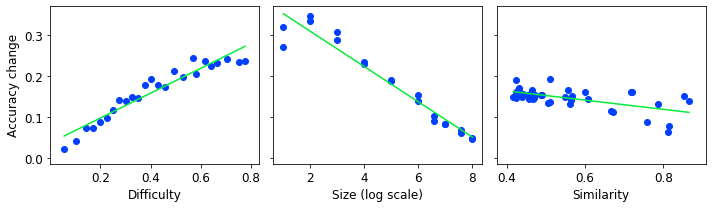

In [25]:
fig, ax = plt.subplots(1, 3, sharey=True, figsize=(10, 3))

ax[0] = plot_regression(
    ax[0],
    x=list(1-df_diff['acc_base_in']),
    ytrue=df_diff['acc_change_in'],
    model=lr_diff)
ax[0].set_xlabel('Difficulty')
ax[0].set_ylabel('Accuracy change')

ax[1] = plot_regression(
    ax[1],
    x=np.log2(df_size['size']),
    ytrue=df_size['acc_change_in'],
    model=lr_size)
ax[1].set_xlabel('Size (log scale)')

ax[2] = plot_regression(
    ax[2],
    x=df_sim['similarity'],
    ytrue=df_sim['acc_change_in'],
    model=lr_sim)
ax[2].set_xlabel('Similarity')

plt.tight_layout()
# plt.savefig('regression.pdf')
plt.show()

In [26]:
len(df_diff), len(df_size), len(df_sim)

(25, 20, 40)

### Rank correlation coefficients

In [27]:
from scipy.stats import spearmanr, kendalltau

In [28]:
x = [1-df_sem['acc_base_in'], df_sem['size'], df_sem['similarity']]
y = df_sem['acc_change_in']
df_corr = pd.DataFrame({
    'property': ['difficulty', 'size', 'similarity'],
    'rho_spearman': [spearmanr(x_i, y).correlation for x_i in x],
    'pval_spearman': [spearmanr(x_i, y).pvalue for x_i in x],
    'tau_kendall': [kendalltau(x_i, y).correlation for x_i in x],
    'pval_kendall': [kendalltau(x_i, y).pvalue for x_i in x]})
df_corr.round(decimals=3)

,property,rho_spearman,pval_spearman,tau_kendall,pval_kendall
0,difficulty,0.657,0.156,0.6,0.136
1,size,-0.714,0.111,-0.6,0.136
2,similarity,-0.314,0.544,-0.2,0.719


In [29]:
x = [1-df_diff['acc_base_in'], df_size['size'], df_sim['similarity']]
y = [df_diff['acc_change_in'], df_size['acc_change_in'], df_sim['acc_change_in']]
df_corr = pd.DataFrame({
    'property': ['difficulty', 'size', 'similarity'],
    'rho_spearman': [spearmanr(x_i, y_i).correlation for (x_i, y_i) in zip(x, y)],
    'pval_spearman': [spearmanr(x_i, y_i).pvalue for (x_i, y_i) in zip(x, y)],
    'tau_kendall': [kendalltau(x_i, y_i).correlation for (x_i, y_i) in zip(x, y)],
    'pval_kendall': [kendalltau(x_i, y_i).pvalue for (x_i, y_i) in zip(x, y)]})
df_corr.round(decimals=4)

,property,rho_spearman,pval_spearman,tau_kendall,pval_kendall
0,difficulty,0.9546,0.0000,0.8467,0.0000
1,size,-0.9721,0.0000,-0.9084,0.0000
2,similarity,-0.5096,0.0008,-0.3692,0.0008
